In [31]:
import numpy as np 
import pandas as pd 
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
        
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV,
    RandomizedSearchCV
)
#Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets
import joblib
from sklearn.ensemble import RandomForestRegressor
# Configurar o estilo de grafico do ggplot
plt.style.use('ggplot')

# Configurar para exibir até 15 linhas de um Dataframe do pandas
pd.set_option('display.max_rows', 15)

# Configurar para exibir todas as colunas de um dataframe do pandas
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

COR1 ='#A63446'
COR2 = '#0C6291'
COR3 = '#000004'
list_color = ['#A63446', '#0C6291'] 

In [32]:
order_items    = pd.read_csv("olist/olist_order_items_dataset.csv")
orders         = pd.read_csv("olist/olist_orders_dataset.csv")
order_payments = pd.read_csv("olist/olist_order_payments_dataset.csv")
products       = pd.read_csv("olist/olist_products_dataset.csv")
customers      = pd.read_csv("olist/olist_customers_dataset.csv")
sellers        = pd.read_csv("olist/olist_sellers_dataset.csv")
product_category_translation = pd.read_csv("olist/product_category_name_translation.csv")

order_data = order_items.merge(orders, on='order_id') \
                    .merge(order_payments, on=['order_id']) \
                    .merge(products, on='product_id') \
                    .merge(customers, on='customer_id') \
                    .merge(sellers, on='seller_id') \
                    .merge(product_category_translation, on='product_category_name')


order_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1,credit_card,2,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,1,boleto,1,73.86,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,1,credit_card,2,83.23,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,1,credit_card,3,75.07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,1,credit_card,4,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,27277,volta redonda,SP,cool_stuff


In [33]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115878 non-null  object 
 1   order_item_id                  115878 non-null  int64  
 2   product_id                     115878 non-null  object 
 3   seller_id                      115878 non-null  object 
 4   shipping_limit_date            115878 non-null  object 
 5   price                          115878 non-null  float64
 6   freight_value                  115878 non-null  float64
 7   customer_id                    115878 non-null  object 
 8   order_status                   115878 non-null  object 
 9   order_purchase_timestamp       115878 non-null  object 
 10  order_approved_at              115864 non-null  object 
 11  order_delivered_carrier_date   114673 non-null  object 
 12  order_delivered_customer_date 

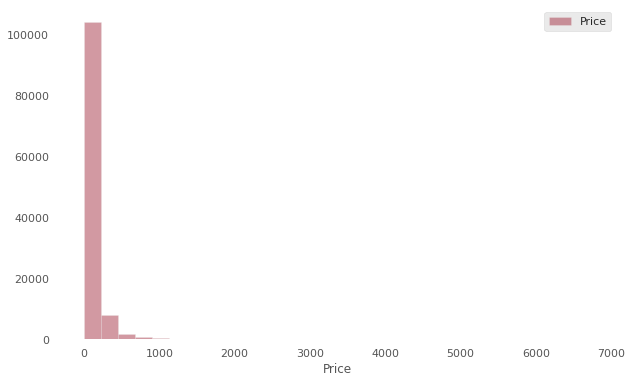

In [34]:
fig, ax = plt.subplots(figsize=(10,6), dpi = 72)
order_data['price'].hist(alpha = 0.5, bins = 30, color = COR1, label = 'Price')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('none')  
ax.grid(False)
ax.set_xlabel('Price')
ax.legend()

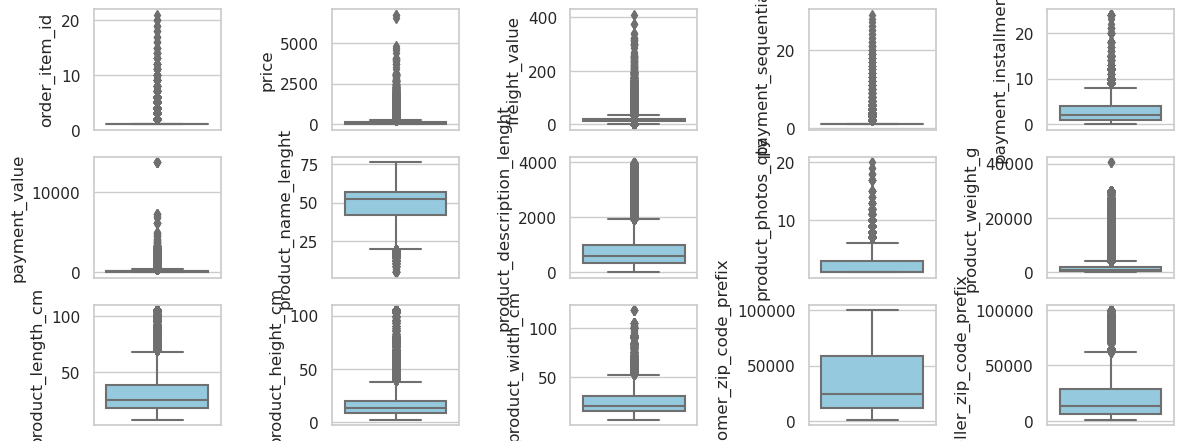

In [35]:
numeric = order_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
for i, var in enumerate(numeric, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=order_data, y=var, color='skyblue')  # Box plot para cada variável

# Ajustar o layout
plt.tight_layout()

# Mostrar os box plots
plt.show()

In [36]:
numeric = order_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric

['order_item_id',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'customer_zip_code_prefix',
 'seller_zip_code_prefix']

In [37]:
order_data.isnull().sum().sort_values(ascending=False)/order_data.shape[0]

order_delivered_customer_date    0.021531
order_delivered_carrier_date     0.010399
order_approved_at                0.000121
product_width_cm                 0.000009
product_weight_g                 0.000009
                                   ...   
price                            0.000000
shipping_limit_date              0.000000
seller_id                        0.000000
product_id                       0.000000
product_category_name_english    0.000000
Length: 34, dtype: float64

In [38]:
#Excluir dados irrelevantes
order_data = order_data.drop(["seller_id", 'freight_value'], axis = 1)

In [39]:
numeric = order_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric

['order_item_id',
 'price',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'customer_zip_code_prefix',
 'seller_zip_code_prefix']

In [40]:
# Colunas que importam
order_data = order_data[['product_category_name', 
            'product_name_lenght',
            'product_description_lenght', 
            'product_photos_qty', 
            'product_weight_g',
            'product_length_cm', 
            'product_height_cm', 
            'product_width_cm',
            "price"]]
# Excluindo valores ausentes
order_data = order_data.dropna()
order_data.isnull().sum().sort_values(ascending=False)/order_data.shape[0]

product_category_name         0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
price                         0.0
dtype: float64

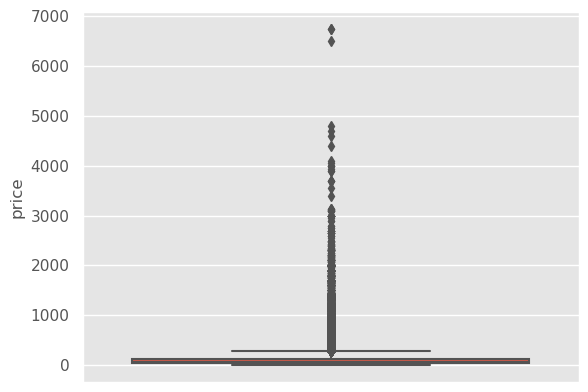

In [41]:
plt.style.use('ggplot')
sns.boxplot(y = 'price', data = order_data)
plt.show()

In [42]:
order_data.price.describe()

count    115877.000000
mean        120.909070
std         184.140924
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [43]:

analise_out = ['product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'price']



def detect_outliers(column):
    Q1 = column.quantile(0.05)
    Q3 = column.quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier = column[(column < lower_bound) | (column > upper_bound)]
    return outlier

outliers = {}

for i in analise_out:
    outlier = detect_outliers(order_data[i])
    outliers[i] = outlier
    
order_outlier = pd.DataFrame(outliers)

count_outliers = order_outlier.count()
loan_contagem_outlier = pd.DataFrame({'Variavel': count_outliers.index, 'Quantidade de Outliers': count_outliers.values})
loan_contagem_outlier

,Variavel,Quantidade de Outliers
0,product_name_lenght,0
1,product_description_lenght,0
2,product_photos_qty,36
3,product_weight_g,504
4,product_length_cm,0
5,product_height_cm,0
6,product_width_cm,73
7,price,1287


In [44]:


numerical_features= ['product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']

categorical_features = ['product_category_name']

In [45]:
features = [
    'product_name_lenght',
    'product_description_lenght', 
    'product_photos_qty', 
    'product_weight_g',
    'product_length_cm', 
    'product_height_cm', 
    'product_width_cm', 
    'product_category_name'
    
]

target = 'price'



In [46]:
X = order_data[features]
y = order_data[target]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_test.head()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
59861,56.0,794.0,1.0,2050.0,28.0,34.0,28.0,esporte_lazer
22128,60.0,188.0,1.0,1300.0,44.0,2.0,35.0,cama_mesa_banho
45180,44.0,412.0,1.0,9900.0,40.0,20.0,30.0,utilidades_domesticas
52942,59.0,341.0,2.0,1750.0,37.0,22.0,40.0,ferramentas_jardim
65465,36.0,1000.0,1.0,525.0,18.0,12.0,12.0,esporte_lazer


In [49]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder())
])


custom_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

modelo = RandomForestRegressor()

pipe_final = Pipeline(steps=[
    ('preprocessador', custom_preprocessor),
    ('model', modelo)
])

pipe_final.fit(X_train, y_train)




Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'product_weight_g',
                                                   'product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder())]),
                                                  ['product_category_name'])])),
                ('model', RandomForestRegressor())])

In [50]:
from numpy import mean
from numpy import std
scores = -1 * cross_val_score(pipe_final, X_train, y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

print(scores)


[24.48587726 23.61272546 24.0678343  23.88236982 24.94862314]


In [51]:
scores.mean()

24.199485995189

In [52]:
scores.std()

0.47019340484112526

In [53]:
# Make prediction on the test data
y_pred = pipe_final.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# Evaluate the model performance
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

MAE: 22.10984109906176
MSE: 10685.73307349288
Mean Absolute Percentage Error (MAPE): 23.153846593528847%
RMSE: 103.37181953266025


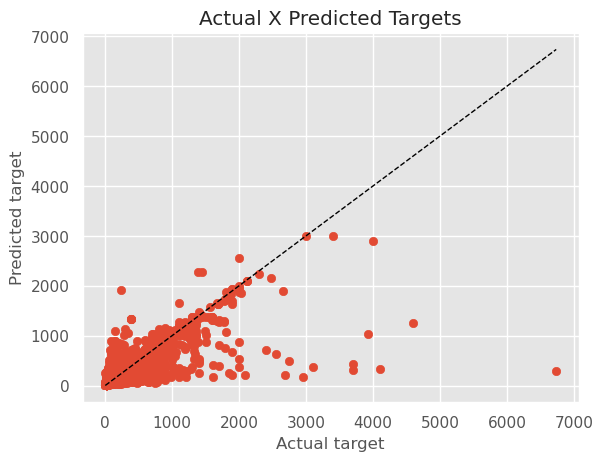

In [54]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color = 'black', linewidth = 1)
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('Actual X Predicted Targets')
plt.show()

In [55]:
import joblib 

# Serialização:
joblib.dump(pipe_final, 'modelo_treinado2.joblib')




['modelo_treinado2.joblib']